<a href="https://colab.research.google.com/github/theindianwriter/cs6910_assignment1/blob/main/DL_Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy.special import expit
from sklearn.metrics import log_loss

In [5]:
from keras.datasets import fashion_mnist

In [6]:
def data_loader():
  (x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
  num_of_train_data = x_train.shape[0]
  combined_training_data = list(zip(x_train,y_train))
  np.random.shuffle(combined_training_data)
  (x_train,y_train) = zip(*combined_training_data)
  x_train,y_train = np.array(x_train),np.array(y_train)
  validation_size = int(0.1*num_of_train_data)
  x_validation = x_train[:validation_size]
  y_validation = y_train[:validation_size]
  x_train = x_train[validation_size:]
  y_train = y_train[validation_size:]
  return x_train,y_train,x_validation,y_validation,x_test,y_test


In [7]:
x_train,y_train,x_validation,y_validation,x_test,y_test = data_loader()
print("information regarding the training,validation and test dataset")
print("the size of training dataset is {},validation set is {},test set is {}".format(x_train.shape[0],x_validation.shape[0],x_test.shape[0]))

4423680/4422102 [==============================] - 0s 0us/step
information regarding the training,validation and test dataset
the size of training dataset is 54000,validation set is 6000,test set is 10000


In [8]:
def vectorize(Y):
  Y_vectorize = np.zeros((Y.shape[0],10))
  for i in range(Y.shape[0]):
      Y_vectorize[i][Y[i]] = 1.0
  return Y_vectorize

In [9]:
def prep_data(X,Y):
#   X_norm = X.astype('float32')/255.0
#   X_norm_vector = np.array([np.reshape(x,(784,1)) for x in X_norm])
#   Y_vectorize = np.array([vectorize(y) for y in Y])
    X_vector = np.array([np.reshape(x,(784))for x in X])
    mean = np.mean(X_vector,axis = 0)
    std = np.std(X_vector,axis = 0)
    X_norm_vector = (X_vector - mean)/std
    Y_vectorize = vectorize(Y)
    return X_norm_vector,Y_vectorize

In [10]:
class_label = ['T-shirt/top', 
           'Trousers', 
           'Pullover', 
           'Dress', 'Coat', 
           'Sandal', 
           'Shirt', 
           'Sneaker', 
           'Bag', 
           'Ankle boot']

In [11]:
#Q1 plots one image of each class 

def plot_each_label(X,Y):
  rows = 2
  cols = 5
  fig = plt.figure()
  ax = []
  j = 0
  for i in range(1,rows*cols + 1):
    ax.append(fig.add_subplot(rows,cols,i))
    pos = np.where(Y == j)
    plt.imshow(X[pos[0][0]])
    plt.xticks([])
    plt.yticks([])
    ax[-1].set_title(class_label[j])
    j += 1
  plt.show()


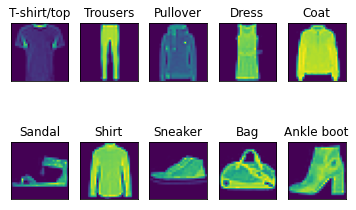

In [12]:
#Q1 calls and plots image of each class
plot_each_label(x_train,y_train)

In [13]:
def sigmoid(X):
    # return 1.0/(1.0 + np.exp(-x))

    return expit(X) #to avoid overflow

def softmax(X):
    # e_x = np.exp(x - np.max(x))
    # return e_x / e_x.sum()
    output = np.zeros(X.shape)
    for col in range(X.shape[1]):
        exps = np.exp(X[:,col] - np.max(X[:,col]))
        output[:,col] = exps/exps.sum()

    return output

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

  

In [139]:
class Network:
  #initialization of the network
  def __init__(self,layers,weight_initilizer = "random"):
    
    self.num_of_layers = len(layers)
    self.layers = layers

    if weight_initilizer == 'random':
      self.random(layers)
    elif weight_initilizer == 'Xavier':
      self.Xavier(layers)
    else:
      print("ERROR")

  def random(self,layers):
    self.biases = [np.zeros((x,1)) for x in layers[1:]]
    self.weights = [np.random.randn(x,y)*2/np.sqrt(y+x) for x,y in zip(layers[1:],layers[:-1])]

  def Xavier(self,layers):
    self.biases = []
    self.weights = []
    print("IMPLEMENTATION OF XAVIER")


  def calculate_loss(self,Y,Y_predicted):
    if self.loss == "cross_entropy_loss":
    #   N = X.shape[0]
    #   error = 0.0
    #   for x,y in zip(X,Y):
    #     a,h = self.forward_propagation(x)
    #     y_estimated = h[-1]
    #     y_class = np.argmax(y)
    #     y_estimated[y_class] =  0.0000000001 if int(y_estimated[y_class]) == 0 else y_estimated[y_class]
    #     error += -np.log(y_estimated[y_class])
        error = log_loss(Y,Y_predicted)
        return error


  def show_network(self):
    print(self.biases)
    print(self.weights)

  def perform_activation(self,A):
 
    if self.activation == 'sigmoid':
      H = sigmoid(A)
    else:
      print("ERROR")
    return H

  def perform_output_function(self,A):

    if self.output_function == "softmax":
      H = softmax(A)
    else:
      print("ERROR")

    return H


  def update_parameter(self,grad_wrt_weights,grad_wrt_biases,eta):
    if self.optimizer == "sgd":
      self.weights = [w - eta*gw for w,gw in zip(self.weights,grad_wrt_weights)]
      self.biases = [b - eta*gb for b,gb in zip(self.biases,grad_wrt_biases)]

  def forward_propagation(self,X):
    #input vector to the network
    A_i = X.T
    #array to store pre-activation vectors of the hidden layers and output layer
    A = []
    #array to store post activation vectors of the input layer,hidden layers and ouput layer
    H = [X.T]
    w,b = self.weights[0],self.biases[0]
    A_i = np.matmul(w,X.T) + b
    A.append(A_i)
    H.append(A_i)
    #calulating the pre-activation and post-activation vectors in the hidden layers
    for w,b in zip(self.weights[1:-1],self.biases[1:-1]):
      A_h = np.matmul(w,A[-1])+ b
      A.append(A_h)
      H_i = self.perform_activation(A_h)
      H.append(H_i)

    #calculating the pre-activation and post-activation vector in the output layer
    w,b = self.weights[-1],self.biases[-1]
    A_o = np.matmul(w,A[-1]) + b
    A.append(A_o)
    H_o = self.perform_output_function(A_o)
    H.append(H_o)
    return A,H,H[-1]


  def get_delta_last_layer(self,A,H,Y):

    if self.output_function == "softmax":
      delta = H - Y.T
      return delta
    else: 
      print("ERROR")

  def backward_propagation(self,X,Y,A,H):
    #delta = [0]*(self.num_of_layers-1)
    grad_wrt_weights = [np.zeros(w.shape) for w in self.weights]
    grad_wrt_biases = [np.zeros(b.shape) for b in self.biases]
    N = X.shape[0]
    delta = self.get_delta_last_layer(A[-1],H[-1],Y)
    grad_wrt_biases[-1] = (1/N)*np.sum(delta,axis = 1,keepdims = True)
    grad_wrt_weights[-1] = (1/N)*np.matmul(delta,H[-2].T)
    for l in range(2,self.num_of_layers):
      delta = np.matmul(grad_wrt_weights[-l+1].T,delta)*(sigmoid_derivative(A[-l]))
      grad_wrt_biases[-l] = (1/N)*np.sum(delta,axis = 1,keepdims = True)
      grad_wrt_weights[-l] = (1/N)*np.matmul(delta,H[-l-1].T)
      
    return grad_wrt_weights,grad_wrt_biases

  def fit(self,x_train,y_train,epochs = 5, eta = 0.001,batch_size = 64):
      
    N = x_train.shape[0]
    for epoch in range(epochs):

        batch_error = 0
        combined_training_data = list(zip(x_train,y_train))
        np.random.shuffle(combined_training_data)
        x_train[:],y_train[:] = zip(*combined_training_data)
        x_train,y_train = np.array(x_train),np.array(y_train)

        mini_x_batches = [x_train[i:i+batch_size] for i in range(0,N,batch_size)]
        mini_y_batches = [y_train[i:i+batch_size] for i in range(0,N,batch_size)] 

        for X,Y in zip(mini_x_batches,mini_y_batches):
            # grad_wrt_weights = [np.zeros(w.shape) for w in self.weights]
            # grad_wrt_biases = [np.zeros(b.shape) for b in self.biases]
        # for x,y in zip(mini_x_batch,mini_y_batch):
        #       #forward propagation
        #   a,h = self.forward_propagation(x)
        #       #backward_propagation
        #   grad_del_wrt_weights,grad_del_wrt_biases = self.backward_propagation(x,y,a,h)

        #   grad_wrt_weights = [gw + dgw for gw,dgw in zip(grad_wrt_weights,grad_del_wrt_weights)]
        #   grad_wrt_biases = [gb + dgb for gb,dgb in zip(grad_wrt_biases,grad_del_wrt_biases)]

            A,H,Y_predicted = self.forward_propagation(X)
            grad_wrt_weights,grad_wrt_biases = self.backward_propagation(X,Y,A,H)

          #gradient descent variant
            self.update_parameter(grad_wrt_weights,grad_wrt_biases,eta)
            batch_error += self.calculate_loss(Y.T,Y_predicted)
        print("In epoch {} the loss is {}".format(epoch,batch_error))

  def compile(self,optimizer = "sgd",loss = "squared-error",activation = "sigmoid",output_function = "softmax",metrics = "accuracy"):

    self.activation = activation
    self.output_function = output_function
    self.optimizer = optimizer
    self.loss = loss
    self.metrics = metrics


  def test(self,X,Y):
    if self.metrics == "accuracy":
    #   N = x_test.shape[0]
    #   count = 0
    #   for x,y in zip(x_test,y_test):
    #     a,h = self.forward_propagation(x)
    #     y_estimated = h[-1]
    #     if np.argmax(y_estimated) == np.argmax(y):
    #       count += 1
    #   print("the accuracy is ",(count/N)*100)
        A,H,Y_predicted = self.forward_propagation(X)
        Y_list = np.argmax(Y.T,axis = 0).reshape(Y.T.shape[1], 1)
        Y_list_predicted = np.argmax(Y_predicted,axis = 0).reshape(Y.T.shape[1], 1)
        accuracy_matrix = Y_list_predicted == Y_list
        accuracy_list = list(accuracy_matrix)
        correct = accuracy_list.count([True])
        return (correct*100)/len(accuracy_list)



In [15]:
x_train_transformed,y_train_transformed = prep_data(x_train,y_train)

In [151]:
net = Network([784,400,10],weight_initilizer="random")
net.compile(optimizer = "sgd",loss = "cross_entropy_loss",activation = "sigmoid",output_function = "softmax",metrics = "accuracy")


In [152]:
net.fit(x_train_transformed,y_train_transformed,epochs = 10, eta = 0.001,batch_size = 64)

In epoch 0 the loss is 18245.342444585258
In epoch 1 the loss is 14253.49326551966
In epoch 2 the loss is 13488.870232819916
In epoch 3 the loss is 13079.248061484644
In epoch 4 the loss is 12832.91118678425
In epoch 5 the loss is 12640.005898542668
In epoch 6 the loss is 12474.719760228796
In epoch 7 the loss is 12313.776196158484
In epoch 8 the loss is 12231.210545766686
In epoch 9 the loss is 12148.71147526136


In [107]:
x_test_transformed,y_test_transformed = prep_data(x_test,y_test)

In [153]:
net.test(x_test_transformed,y_test_transformed)

75.75